The Physician's Global Assessment (PGA) is a commonly used GCA measurement for disease severity in patients. This script uses the Active GCA plasma proteins and the Active GCA patients' clinical and demographic data to identify proteins associated with PGA. Marginal linear regression models were constructed between all proteins and six clinical and demographic variables (age, smoking status, sex, prednisone use, aspirin use, and methotrexate use). Variables with a P-value < 0.05 were included in the full multiple linear regression model between protein abundance and PGA. After constructing the linear regression models, Spearman rho values, along with their corresponding P-values, were calculated between proteins and PGA. All proteins with a P-value < 0.05 and an |Spearman rho| > 0.4 were identified as significant associations. A volcano plot is made at the very end, with the proteins of interest highlighted in colors (blue and red).

In [1]:
library("ggplot2")
library("dplyr")

vasculitis_demographics_df <- read.csv("../../data/vasculitis_patient_info.csv")
#read in all quantile data
all_quantile_df = read.csv("../../data/all_quantile_data.csv")
#head(all_quantile_df)
#get the number of columns and rows 
num_columns <- ncol(all_quantile_df)
num_proteins <- ncol(all_quantile_df) - 3
num_samples <- nrow(all_quantile_df)

#filter only active gca patients
active_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Active")
active_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Active")
active_proteins_only <- active_df[,4:num_columns]

proteins_only <- data.frame(active_df[ ,4:num_columns])
#seperate the protein names for the linear model
protein_names <- data.frame(matrix(data=0,nrow=num_proteins,ncol=1))
colnames(protein_names) <- "Protein"
protein_names[ , 1] <- data.frame(colnames(proteins_only))
#protein_names



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#Protein ~ Study_group	Age	Smoking	Prednisone	Methotrexate	Aspirin
#function_name <- function(arg_1, arg_2, ...) {
#   Function body 
#}
make_linear_model <- function(binary_results){
    #binary_results is the row from the binary data, 7 columns with 6 values
    model_string = "~ PGA"
    if(binary_results[1,2] == 1){
        model_string = paste0(model_string," + Age")
    }
    if(binary_results[1,3] == 1){
        model_string = paste0(model_string," + Sex")
    }
    if(binary_results[1,4] == 1){
        model_string = paste0(model_string," + Smoking")
    }
    if(binary_results[1,5] == 1){
        model_string = paste0(model_string," + Prednisone")
    }    
    if(binary_results[1,6] == 1){
        model_string = paste0(model_string," + Methotrexate")
    }    
    if(binary_results[1,7] == 1){
        model_string = paste0(model_string," + Aspirin")
    }    
    return(model_string)
}


In [3]:
#do linear modeling between active gca and disease activity
#gather the demographics I need for active GCA 
#age,sex,smoking,prednisone,methotrexate,and aspirin
#check that the demographics and protein data is in the same order
print(active_demographics_df$maskid == active_df$maskID)
#head(active_demographics_df)
active_demographics_df = active_demographics_df[order(active_demographics_df$maskid),]
#head(active_demographics_df)
active_df = active_df[order(active_df$maskID),]
print(active_demographics_df$maskid == active_df$maskID)
active_gca_demographics_and_proteins_df <- data.frame(active_demographics_df$Age)
colnames(active_gca_demographics_and_proteins_df) <- ("Age")
active_gca_demographics_and_proteins_df$Sex <- active_demographics_df$Sex
active_gca_demographics_and_proteins_df$Smoking <- active_demographics_df$Smoking
active_gca_demographics_and_proteins_df$Prednisone <- active_demographics_df$PrednisoneCurrentlyReceiving
active_gca_demographics_and_proteins_df$Methotrexate <- active_demographics_df$MethotrexateWasTaken
active_gca_demographics_and_proteins_df$Aspirin <- active_demographics_df$Aspirin
active_gca_demographics_and_proteins_df$PGA = active_demographics_df$MH_PGA
active_gca_demographics_and_proteins_df2 <- cbind(active_gca_demographics_and_proteins_df,active_df)

dim(active_gca_demographics_and_proteins_df2)
head(active_gca_demographics_and_proteins_df2)
#now I have all the active demographics and protein abundance together

 [1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE


[1]   30 7299

,Age,Sex,Smoking,Prednisone,Methotrexate,Aspirin,PGA,Study_group,maskID,sample_ID,⋯,YIPF6_9984.12,Neuropeptide.W_9986.14,LRC25.CD_9987.30,LRC24_9989.12,EMIL3.region.2_9991.112,ZN264_9993.11,ATP4B_9994.217,DUT_9995.6,UBXN4.CD.1_9997.12,IRF6_9999.1
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,69.0,Male,No,No,No,No,3,Active,GCA-1,KP9U,⋯,649.2867,894.7389,598.0333,443.9956,517.2722,1204.756,1566.538,2044.943,8510.258,1209.892
10,71.7,Female,No,No,No,Yes,10,Active,GCA-10,KP65,⋯,736.1233,6146.9767,706.8956,572.3411,562.4100,1561.303,1957.536,1538.510,7314.908,1248.330
11,79.6,Male,No,No,No,No,6,Active,GCA-11,KP6H,⋯,597.2511,6533.3933,628.7183,421.1589,646.5733,1059.590,1458.270,2480.667,16116.304,1959.607
12,63.1,Female,Yes,Yes,No,Yes,2,Active,GCA-12,KP68,⋯,824.2256,13545.5367,647.4622,488.0311,724.4200,1414.184,1841.411,1013.286,5191.104,1031.876
13,65.3,Female,Yes,No,Past Week,Yes,4,Active,GCA-13,KNYU,⋯,595.7067,921.9889,668.1467,429.1311,555.9972,1254.516,1780.357,1772.148,12623.967,1304.062
14,72.4,Female,No,Yes,No,Yes,8,Active,GCA-14,KP9R,⋯,585.1022,533.8333,633.7272,516.6922,606.2356,1584.080,1672.191,1762.696,7172.306,1289.327


In [4]:
#now I can start the linear modeling
#make a dataframe to hold the results
linear_modeling_results <- data.frame(matrix(data=0,nrow=num_proteins,ncol=7))
colnames(linear_modeling_results) <- cbind("Proteins","Age","Sex","Smoking","Prednisone","Methotrexate","Aspirin")
linear_modeling_results[,1] <- protein_names
head(linear_modeling_results)

,Proteins,Age,Sex,Smoking,Prednisone,Methotrexate,Aspirin
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,0,0,0,0,0,0
2,c.Raf_10001.7,0,0,0,0,0,0
3,ZNF41_10003.15,0,0,0,0,0,0
4,ELK1_10006.25,0,0,0,0,0,0
5,GUC1A_10008.43,0,0,0,0,0,0
6,BECN1_10010.10,0,0,0,0,0,0


In [5]:
#loop through all proteins using all covariates
for(i in 1:num_proteins){
    protein_name <- protein_names[i,1]
    age_model <- lm(paste0(protein_name, " ~ Age"),data = active_gca_demographics_and_proteins_df2)
    pvalue1 <- summary(age_model)$coefficients[2,4]
    linear_modeling_results[i,2] <- pvalue1
    
    sex_model <- lm(paste0(protein_name, " ~ Sex"),data = active_gca_demographics_and_proteins_df2)
    pvalue2 <- summary(sex_model)$coefficients[2,4]
    linear_modeling_results[i,3] <- pvalue2
    
    smoking_model <- lm(paste0(protein_name, " ~ Smoking"),data = active_gca_demographics_and_proteins_df2)
    pvalue3 <- summary(smoking_model)$coefficients[2,4]
    linear_modeling_results[i,4] <- pvalue3
    
    prednisone_model <- lm(paste0(protein_name, " ~ Prednisone"),data = active_gca_demographics_and_proteins_df2)
    pvalue4 <- summary(prednisone_model)$coefficients[2,4]
    linear_modeling_results[i,5] <- pvalue4
    
    methotrexate_model <- lm(paste0(protein_name, " ~ Methotrexate"),data = active_gca_demographics_and_proteins_df2)
    pvalue5 <- summary(methotrexate_model)$coefficients[2,4]
    linear_modeling_results[i,6] <- pvalue5
    
    
    aspirin_model <- lm(paste0(protein_name, " ~ Aspirin"),data = active_gca_demographics_and_proteins_df2)
    pvalue6 <- summary(aspirin_model)$coefficients[2,4]
    linear_modeling_results[i,7] <- pvalue6
    
}
print("Done with linear models.")

[1] "Done with linear models."


In [6]:
head(linear_modeling_results)

,Proteins,Age,Sex,Smoking,Prednisone,Methotrexate,Aspirin
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,0.13427927,0.18202506,0.1979056,0.48084649,0.31099860,0.3662457
2,c.Raf_10001.7,0.57725245,0.93162838,0.2606709,0.24957694,0.41047085,0.2211578
3,ZNF41_10003.15,0.23948572,0.15558212,0.8276044,0.05017392,0.01299559,0.3947921
4,ELK1_10006.25,0.09206949,0.09465867,0.6261934,0.10053117,0.46740524,0.4908311
5,GUC1A_10008.43,0.35700484,0.49784220,0.4692942,0.52944124,0.61640258,0.5551631
6,BECN1_10010.10,0.08414101,0.82147570,0.4646555,0.46771854,0.89325553,0.4414908


In [6]:
#save output
write.csv(linear_modeling_results,"../../analysis/Figure4_A_B/active_only_confounders_linear_modeling_with_PGA.csv",row.names=FALSE)

In [9]:
#binarize the results
binary_modeling_results <- data.frame(matrix(data = 0,nrow=num_proteins,ncol=7))
colnames(binary_modeling_results) <- colnames(linear_modeling_results)
binary_modeling_results[,1] <- protein_names
for(i in 1:num_proteins){
    for(j in 2:7){
        current_pval <- linear_modeling_results[i,j]
        if(current_pval < 0.05){
            binary_modeling_results[i,j] <- 1
        }
        else{
            binary_modeling_results[i,j] <- 0
        }
    }    
}


In [10]:
head(linear_modeling_results)
head(binary_modeling_results)

,Proteins,Age,Sex,Smoking,Prednisone,Methotrexate,Aspirin
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,0.13427927,0.18202506,0.1979056,0.48084649,0.31099860,0.3662457
2,c.Raf_10001.7,0.57725245,0.93162838,0.2606709,0.24957694,0.41047085,0.2211578
3,ZNF41_10003.15,0.23948572,0.15558212,0.8276044,0.05017392,0.01299559,0.3947921
4,ELK1_10006.25,0.09206949,0.09465867,0.6261934,0.10053117,0.46740524,0.4908311
5,GUC1A_10008.43,0.35700484,0.49784220,0.4692942,0.52944124,0.61640258,0.5551631
6,BECN1_10010.10,0.08414101,0.82147570,0.4646555,0.46771854,0.89325553,0.4414908


,Proteins,Age,Sex,Smoking,Prednisone,Methotrexate,Aspirin
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,0,0,0,0,0,0
2,c.Raf_10001.7,0,0,0,0,0,0
3,ZNF41_10003.15,0,0,0,0,1,0
4,ELK1_10006.25,0,0,0,0,0,0
5,GUC1A_10008.43,0,0,0,0,0,0
6,BECN1_10010.10,0,0,0,0,0,0


In [11]:
#I have a function that takes the binaryized data and returns a string to use in the model. Run for all proteins
adjusted_linear_modeling_results <- data.frame(matrix(data=0,nrow=num_proteins,ncol= 6))
colnames(adjusted_linear_modeling_results) <- cbind("Protein","Adjusted_linear_model","linear_modeling_pvalue","adjusted_pvalues","fold_change","coefficient")
adjusted_linear_modeling_results[,1] <- protein_names
for(i in 1:num_proteins){
    #get protein name
    current_protein <- protein_names[i,1]
    #make linear model string
    binary_results <- binary_modeling_results[i,]
    model_string <- ""
    model_string <- make_linear_model(binary_results)
    adjusted_linear_modeling_results[i,2] <- model_string
    adjusted_linear_model <- lm(paste0(current_protein,model_string),data = active_gca_demographics_and_proteins_df2)
    pvalue1 <- summary(adjusted_linear_model)$coefficients[2,4]
    adjusted_linear_modeling_results[i,3] <- pvalue1
    coefficient_value <- summary(adjusted_linear_model)$coefficients[2,1]
    adjusted_linear_modeling_results[i,6] <- coefficient_value
}
print("Done with models.")

[1] "Done with models."


In [12]:
head(adjusted_linear_modeling_results)

,Protein,Adjusted_linear_model,linear_modeling_pvalue,adjusted_pvalues,fold_change,coefficient
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,~ PGA,0.4016948,0,0,13.5375657
2,c.Raf_10001.7,~ PGA,0.9010998,0,0,1.4079526
3,ZNF41_10003.15,~ PGA + Methotrexate,0.6937551,0,0,0.7140664
4,ELK1_10006.25,~ PGA,0.4594601,0,0,51.8195838
5,GUC1A_10008.43,~ PGA,0.4385779,0,0,34.4551047
6,BECN1_10010.10,~ PGA,0.5319992,0,0,4.8738942


In [11]:
#add the (BH) adjusted pvalues
adjusted_linear_modeling_results[,4] <- p.adjust(adjusted_linear_modeling_results$linear_modeling_pvalue, method="hochberg")


In [12]:
head(adjusted_linear_modeling_results)

,Protein,Adjusted_linear_model,linear_modeling_pvalue,adjusted_pvalues,fold_change,coefficient
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,~ PGA,0.4016948,0.9999644,0,13.5375657
2,c.Raf_10001.7,~ PGA,0.9010998,0.9999644,0,1.4079526
3,ZNF41_10003.15,~ PGA + Methotrexate,0.6937551,0.9999644,0,0.7140664
4,ELK1_10006.25,~ PGA,0.4594601,0.9999644,0,51.8195838
5,GUC1A_10008.43,~ PGA,0.4385779,0.9999644,0,34.4551047
6,BECN1_10010.10,~ PGA,0.5319992,0.9999644,0,4.8738942


In [13]:
#take the linear modeling p values and add the spearman rho coefficients and plot
PGA_linear_modeling = adjusted_linear_modeling_results[,1:3]
head(PGA_linear_modeling)

,Protein,Adjusted_linear_model,linear_modeling_pvalue
,<chr>,<chr>,<dbl>
1,CRBB2_10000.28,~ PGA,0.4016948
2,c.Raf_10001.7,~ PGA,0.9010998
3,ZNF41_10003.15,~ PGA + Methotrexate,0.6937551
4,ELK1_10006.25,~ PGA,0.4594601
5,GUC1A_10008.43,~ PGA,0.4385779
6,BECN1_10010.10,~ PGA,0.5319992


In [14]:
PGA_linear_modeling$spearman = 0
PGA_linear_modeling$spearman_pvalue = 0
head(PGA_linear_modeling)

,Protein,Adjusted_linear_model,linear_modeling_pvalue,spearman,spearman_pvalue
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,~ PGA,0.4016948,0,0
2,c.Raf_10001.7,~ PGA,0.9010998,0,0
3,ZNF41_10003.15,~ PGA + Methotrexate,0.6937551,0,0
4,ELK1_10006.25,~ PGA,0.4594601,0,0
5,GUC1A_10008.43,~ PGA,0.4385779,0,0
6,BECN1_10010.10,~ PGA,0.5319992,0,0


In [ ]:
matrix1 = active_demographics_df$MH_PGA
for(i in 1:num_proteins){

    matrix2 = active_gca_demographics_and_proteins_df2[,i+10]
    
    cor_results = cor.test(matrix1,matrix2,method="spearman")
    
    pval = cor_results[3]
    rho = cor_results[4]
    
    PGA_linear_modeling[i,4] = rho
    PGA_linear_modeling[i,5] = pval
}
print("done")

Warning message in cor.test.default(matrix1, matrix2, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(matrix1, matrix2, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(matrix1, matrix2, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(matrix1, matrix2, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(matrix1, matrix2, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(matrix1, matrix2, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(matrix1, matrix2, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(matrix1, matrix2, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(matrix1, matrix2, method = "

In [26]:
head(PGA_linear_modeling)
#head(active_proteins_only)
#View(PGA_linear_modeling)

,Protein,Adjusted_linear_model,linear_modeling_pvalue,spearman,spearman_pvalue
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,~ PGA,0.4016948,0.113791106,0.5493554
2,c.Raf_10001.7,~ PGA,0.9010998,0.088680146,0.6412140
3,ZNF41_10003.15,~ PGA + Methotrexate,0.6937551,0.050906257,0.7893533
4,ELK1_10006.25,~ PGA,0.4594601,0.027150004,0.8867531
5,GUC1A_10008.43,~ PGA,0.4385779,0.076690228,0.6870989
6,BECN1_10010.10,~ PGA,0.5319992,-0.003619598,0.9848547


In [28]:
#PGA_linear_modeling = PGA_linear_modeling[order(PGA_linear_modeling$spearman),]
PGA_linear_modeling$log_lm_pvalue = -log10(PGA_linear_modeling$linear_modeling_pvalue)
PGA_linear_modeling$log_spear_pvalue = -log10(PGA_linear_modeling$spearman_pvalue)
head(PGA_linear_modeling)

,Protein,Adjusted_linear_model,linear_modeling_pvalue,spearman,spearman_pvalue,log_lm_pvalue,log_spear_pvalue
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CRBB2_10000.28,~ PGA,0.4016948,0.113791106,0.5493554,0.39610374,0.260146572
2,c.Raf_10001.7,~ PGA,0.9010998,0.088680146,0.6412140,0.04522712,0.192996997
3,ZNF41_10003.15,~ PGA + Methotrexate,0.6937551,0.050906257,0.7893533,0.15879383,0.102728553
4,ELK1_10006.25,~ PGA,0.4594601,0.027150004,0.8867531,0.33775221,0.052197295
5,GUC1A_10008.43,~ PGA,0.4385779,0.076690228,0.6870989,0.35795326,0.162980763
6,BECN1_10010.10,~ PGA,0.5319992,-0.003619598,0.9848547,0.27408899,0.006627839


In [29]:
#save results
write.csv(PGA_linear_modeling,"../../analysis/Figure4_A_B/linear_modeling_with_PGA_results.csv",row.names=FALSE)

In [33]:
significant_positive_lm = data.frame(filter(PGA_linear_modeling,PGA_linear_modeling$linear_modeling_pvalue < 0.05 & PGA_linear_modeling$spearman > 0.4))
dim(significant_positive_lm)
significant_negative_lm = filter(PGA_linear_modeling,PGA_linear_modeling$linear_modeling_pvalue < 0.05 & PGA_linear_modeling$spearman < -0.4)
dim(significant_negative_lm)


[1] 5 7

[1] 11  7

In [34]:
#print(significant_positive_lm)
#print(significant_negative_lm)
#combine all significant proteins to save
all_significant_lm = rbind(significant_positive_lm,significant_negative_lm)
write.csv(all_significant_lm,"../../analysis/Figure4_A_B/all_significant_proteins_with_PGA.csv",row.names=FALSE)

            Protein Adjusted_linear_model linear_modeling_pvalue   spearman
1       IgA_11089.7                 ~ PGA            0.025820093  0.4033589
2      NRAC_13464.8                 ~ PGA            0.033124876  0.4175444
3      TYY2_21913.5                 ~ PGA            0.002470959  0.4060736
4    NUMBL_24947.40                 ~ PGA            0.003978267  0.4560693
5     TPST2_8024.64                 ~ PGA            0.008487937  0.4542595
6     RLA2_10949.59                 ~ PGA            0.018634687 -0.4775607
7    RA51D_12554.10                 ~ PGA            0.024231601 -0.4549382
8    H6ST2_13524.25                 ~ PGA            0.023972702 -0.5250679
9    SCP2D_14175.78           ~ PGA + Sex            0.032236486 -0.5105895
10     RECO_14334.3                 ~ PGA            0.022562214 -0.4191947
11    ULA1_18177.49                 ~ PGA            0.040762908 -0.4327682
12     KITM_19114.8                 ~ PGA            0.020636120 -0.4205520
13    LAMA3_

pdf 
  2

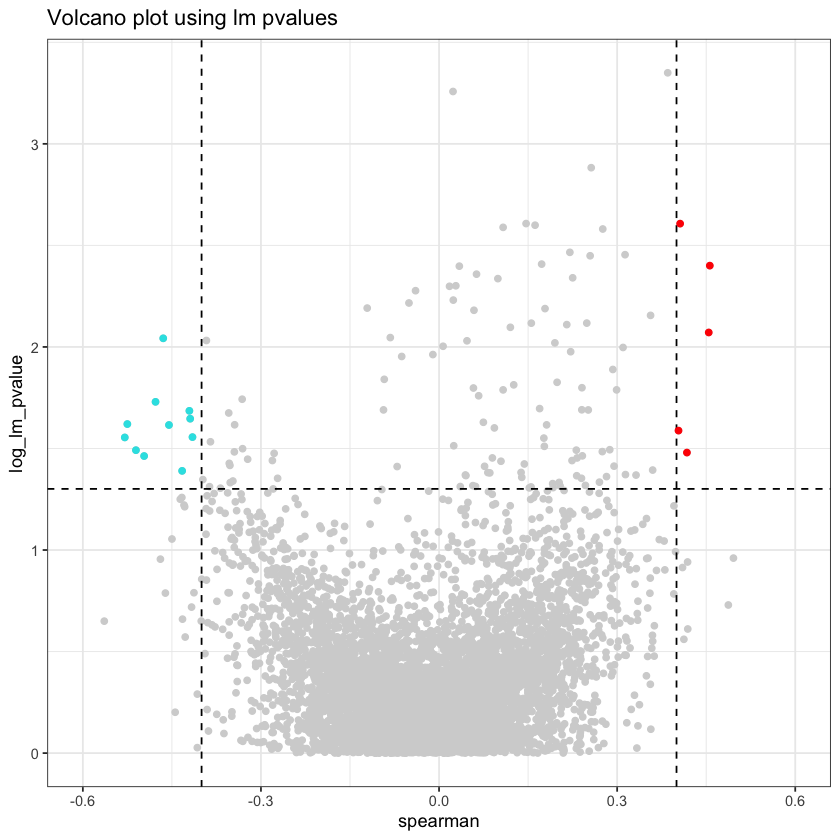

In [40]:
#plot using the lm pvalues
volcano_plot1 = ggplot(PGA_linear_modeling, aes(x = spearman, y = log_lm_pvalue)) + geom_point(color = "light grey") + 
                geom_hline(yintercept=1.301, color = "black",linetype = "dashed")+ geom_vline(xintercept = -0.4, color = "black",linetype = "dashed") +
                geom_vline(xintercept = 0.4, color = "black",linetype = "dashed") +ggtitle("Volcano plot using lm pvalues")+
                theme_bw() + geom_point(data =significant_positive_lm, aes(x=spearman,y=log_lm_pvalue),colour="red")+
                geom_point(data =significant_negative_lm, aes(x=spearman,y=log_lm_pvalue),colour="45B1E4") + xlim(-0.6,0.6) #+ geom_vline(xintercept = 0.2, color = "black") +
                #geom_vline(xintercept = -0.2, color = "black")
pdf("../../analysis/Figure4_A_B/volcano_plot_lm_pvalues.pdf")
print(volcano_plot1)
dev.off()
print(volcano_plot1)